In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_index=pd.read_csv(r"D:\mlr.csv")

In [3]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployement_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.4,1293
4,4,2017,8,2.50,5.6,1256


In [4]:
df_index.columns = df_index.columns.str.strip()  # Strips whitespace from column names

In [5]:
#drop unneccessary columns
df_index.drop(columns=["Unnamed: 0", "year", "month"], axis=1, inplace=True)


In [6]:
df_index.head()

,interest_rate,unemployement_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.4,1293
4,2.50,5.6,1256


In [7]:
## check null values
df_index.isnull().sum()

interest_rate         0
unemployement_rate    0
index_price           0
dtype: int64

C:\Users\vikas\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vikas\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vikas\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


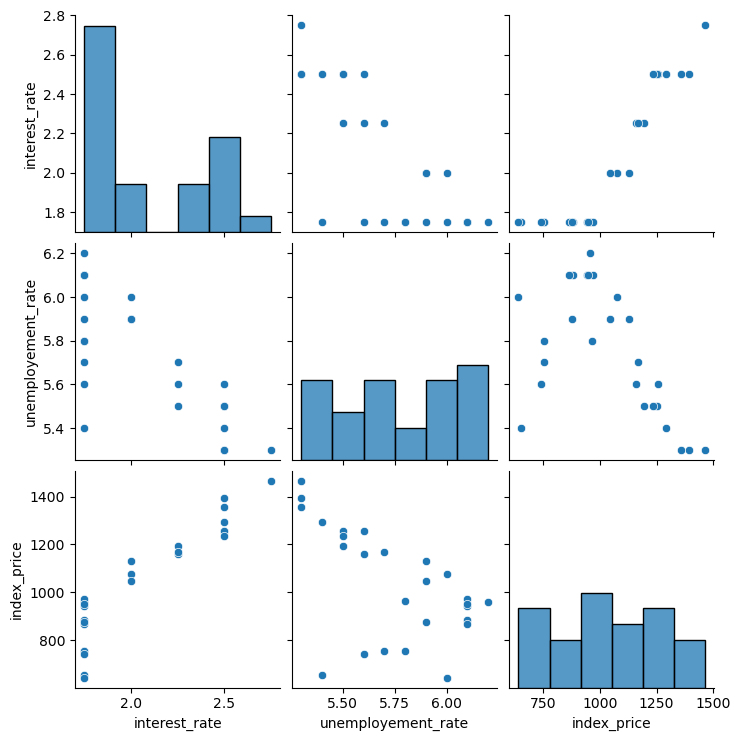

In [8]:
## Lets do some visalization 
import seaborn as sns
sns.pairplot(df_index)

In [9]:
df_index.corr()

,interest_rate,unemployement_rate,index_price
interest_rate,1.000000,-0.765223,0.915475
unemployement_rate,-0.765223,1.000000,-0.561289
index_price,0.915475,-0.561289,1.000000


Text(0, 0.5, 'unemployment rate')

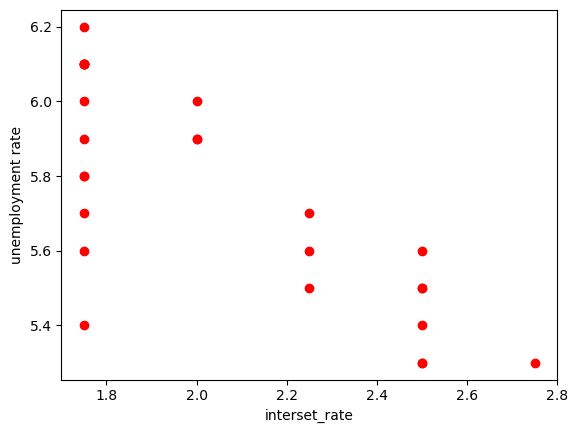

In [10]:
## visualization the more closely 
plt.scatter(df_index['interest_rate'], df_index['unemployement_rate'], color='r')
plt.xlabel("interset_rate")
plt.ylabel("unemployment rate")

In [11]:
## independent and dependent features 
X =df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]


In [12]:
X.head()

,interest_rate,unemployement_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.4
4,2.50,5.6


In [13]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [14]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

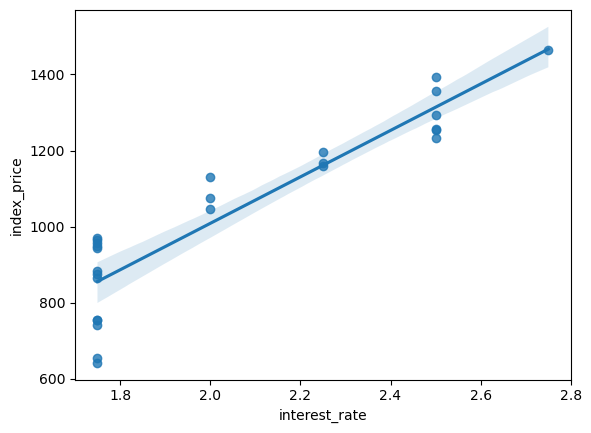

In [15]:
sns.regplot(x='interest_rate', y='index_price', data=df_index)

<Axes: xlabel='interest_rate', ylabel='unemployement_rate'>

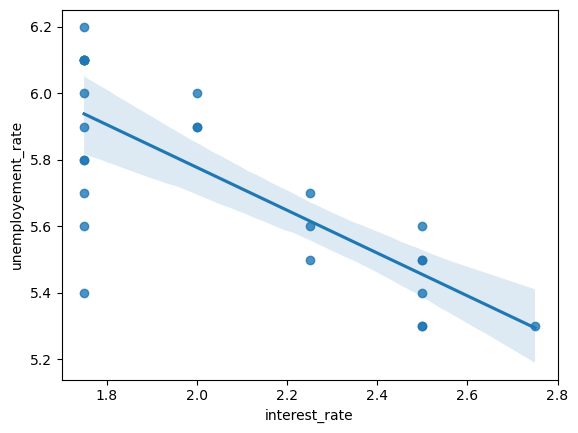

In [16]:
sns.regplot(x='interest_rate', y='unemployement_rate', data=df_index)

<Axes: xlabel='index_price', ylabel='unemployement_rate'>

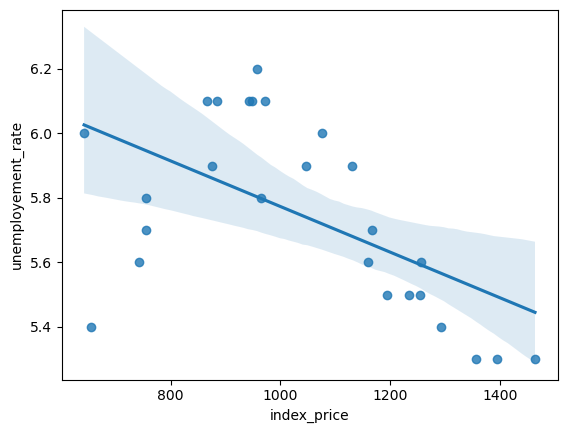

In [17]:
sns.regplot(x='index_price', y='unemployement_rate', data=df_index)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [24]:
y_train

1     1394
23     742
5     1254
2     1357
12    1047
15     958
3     1293
4     1256
21     754
17     949
22     755
18     884
25     642
20     876
7     1195
10    1130
14     943
19     866
6     1234
Name: index_price, dtype: int64

In [20]:
X_train

array([[ 1.36652042, -1.60398176],
       [-0.85895569, -0.56503903],
       [ 1.36652042, -0.91135327],
       [ 1.36652042, -1.60398176],
       [-0.11713032,  0.4739037 ],
       [-0.85895569,  1.51284643],
       [ 1.36652042, -1.25766751],
       [ 1.36652042, -0.56503903],
       [-0.85895569,  0.12758946],
       [-0.85895569,  1.16653219],
       [-0.85895569, -0.21872478],
       [-0.85895569,  1.16653219],
       [-0.85895569,  0.82021794],
       [-0.85895569,  0.4739037 ],
       [ 0.62469505, -0.91135327],
       [-0.11713032,  0.4739037 ],
       [-0.85895569,  1.16653219],
       [-0.85895569,  1.16653219],
       [ 1.36652042, -0.91135327]])

In [27]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [28]:
regression.fit(X_train, y_train)

LinearRegression()

In [33]:
## cross validation 
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [34]:
np.mean(validation_score)

-9809.485778067345

In [37]:
## prediction 
y_pred=regression.predict(X_test)

In [38]:
y_pred

array([1139.24890466,  881.19128798, 1446.28963191,  709.75040098,
       1046.95742925, 1163.74045994,  807.71662212])

In [39]:
## performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse) #root mean sq error


5328.863628382736
52.9437235879394
72.99906594185117


In [41]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.8979359577230397


In [42]:
#display adjusted R-squared 
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.8469039365845595

## Assumption

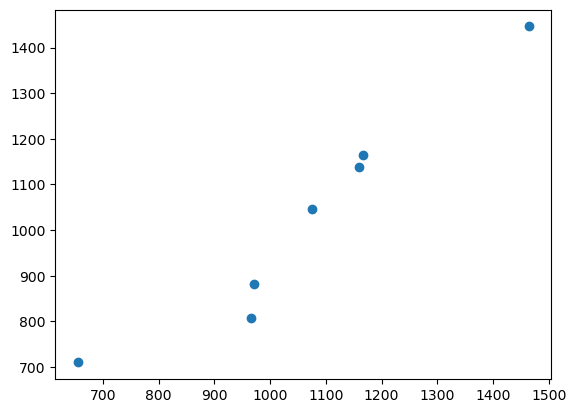

In [43]:
plt.scatter(y_test,y_pred)

In [44]:
residuals=y_test-y_pred

In [45]:
print(residuals)

8      19.751095
16     89.808712
0      17.710368
24    -54.750401
11     28.042571
9       3.259540
13    157.283378
Name: index_price, dtype: float64


C:\Users\vikas\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


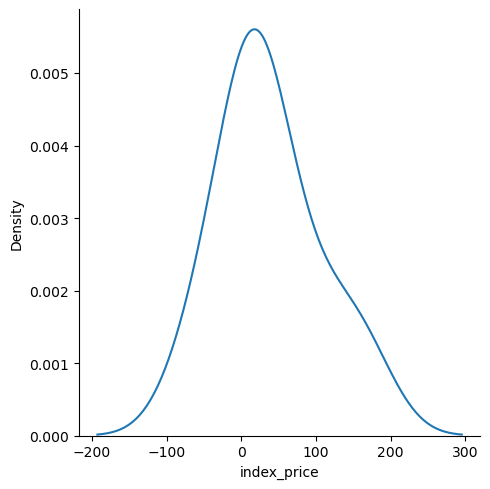

In [46]:
## plot this residuals
sns.displot(residuals,kind='kde')

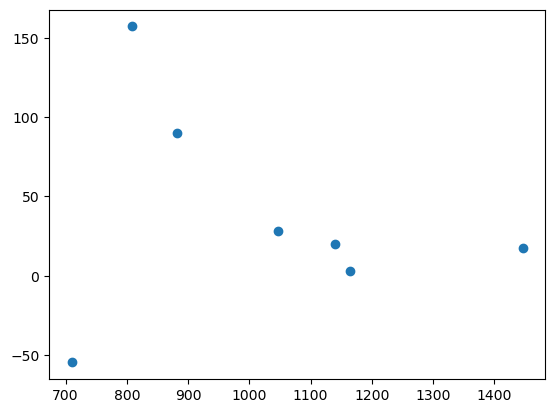

In [48]:
## scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)

In [50]:
## OLS linear regresion
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [51]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.040
Model:                            OLS   Adj. R-squared (uncentered):             -0.073
Method:                 Least Squares   F-statistic:                             0.3555
Date:                Sat, 07 Sep 2024   Prob (F-statistic):                       0.706
Time:                        18:24:24   Log-Likelihood:                         -158.79
No. Observations:                  19   AIC:                                      321.6
Df Residuals:                      17   BIC:                                      323.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\vikas\anaconda\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [52]:
print(regression.coef_)

[263.51668666  66.75272769]
